In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [2]:
async def download(url,filename):
    response=request.get(url)
    if response.status_code==200:
        with open(filename,"wb") as f:
            f.write(response.content)

In [3]:
df=pd.read_excel("C:\\Users\\VIVEK MAHATO\\Downloads\\loan.xlsx")

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Text(0.5, 0, 'log of loan amount')

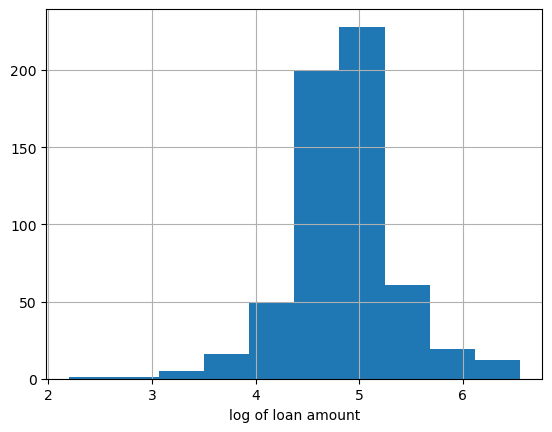

In [6]:
df['LoanAmount_log']=np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=10)
plt.xlabel("log of loan amount")

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

In [8]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']

In [9]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0


Text(0.5, 0, 'Log of Total Income')

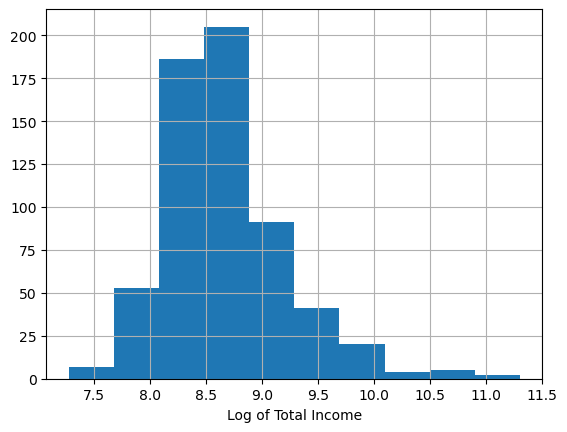

In [10]:
df['TotalIncome_log']=np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=10)
plt.xlabel("Log of Total Income")

In [11]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

In [12]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [13]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['LoanAmount_log'].fillna(df['LoanAmount_log'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [14]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [15]:
x=df.iloc[:,np.r_[1:5,9:11,13:15]]
y=df.iloc[:,12]
x

,Gender,Married,Dependents,Education,Loan_Amount_Term,Credit_History,LoanAmount_log,TotalIncome
0,Male,No,0,Graduate,360.0,1.0,4.857444,5849.0
1,Male,Yes,1,Graduate,360.0,1.0,4.852030,6091.0
2,Male,Yes,0,Graduate,360.0,1.0,4.189655,3000.0
3,Male,Yes,0,Not Graduate,360.0,1.0,4.787492,4941.0
4,Male,No,0,Graduate,360.0,1.0,4.948760,6000.0
...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,360.0,1.0,4.262680,2900.0
610,Male,Yes,3+,Graduate,180.0,1.0,3.688879,4106.0
611,Male,Yes,1,Graduate,360.0,1.0,5.533389,8312.0
612,Male,Yes,2,Graduate,360.0,1.0,5.231109,7583.0


In [16]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [17]:
print("Percent of missing gender is %2f%%"%((df['Gender'].isnull().sum()/df.shape[0])*100))

Percent of missing gender is 0.000000%


No. of people who take loan as group
Gender
Male      502
Female    112
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

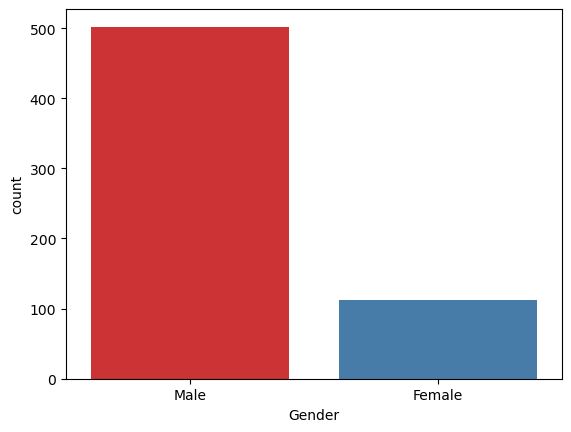

In [18]:
print("No. of people who take loan as group")
print(df['Gender'].value_counts())
sns.countplot(x="Gender",data=df,palette="Set1")

No. of people who take loan as group by marital status
Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

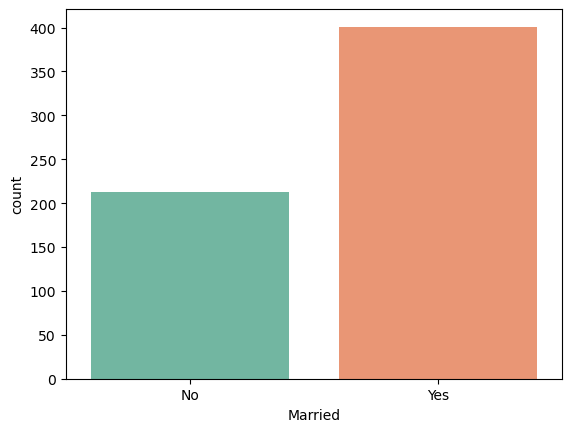

In [19]:
print("No. of people who take loan as group by marital status")
print(df['Married'].value_counts())
sns.countplot(x='Married',data=df,palette="Set2")

No. of people who take loan as group by dependent
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

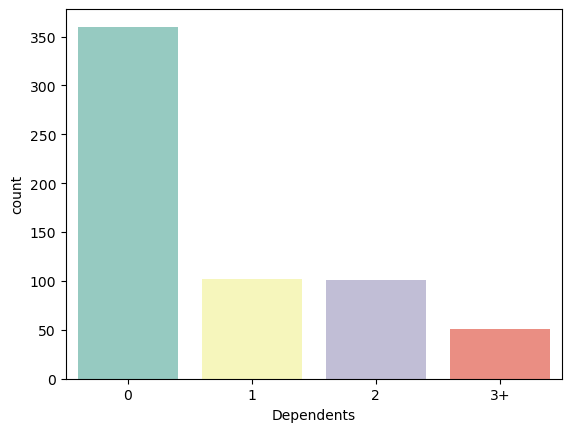

In [20]:
print("No. of people who take loan as group by dependent")
print(df['Dependents'].value_counts())
sns.countplot(x="Dependents",data=df,palette="Set3")

No.of people who take loan as group by self employed
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

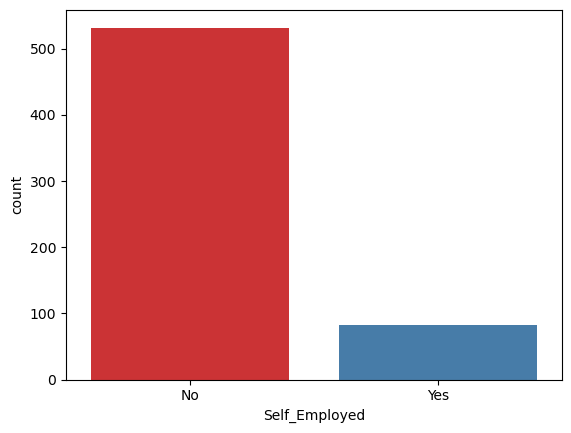

In [21]:
print("No.of people who take loan as group by self employed")
print(df['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed',data=df,palette="Set1")

People who take loan as group by Loan Amount
LoanAmount
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: count, Length: 204, dtype: int64


<Axes: xlabel='LoanAmount', ylabel='count'>

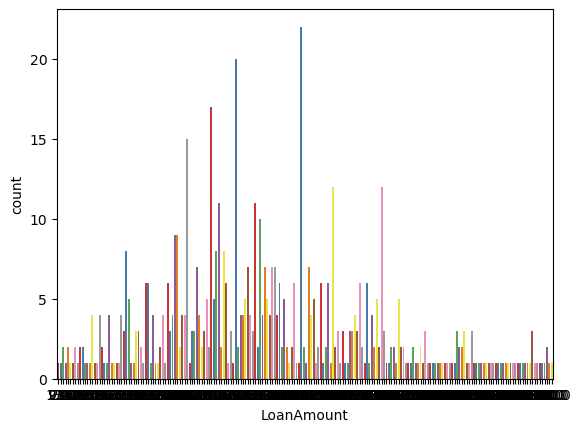

In [22]:
print("People who take loan as group by Loan Amount")
print(df['LoanAmount'].value_counts())
sns.countplot(x="LoanAmount",data=df,palette="Set1")

People of take loan as group by credit history
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

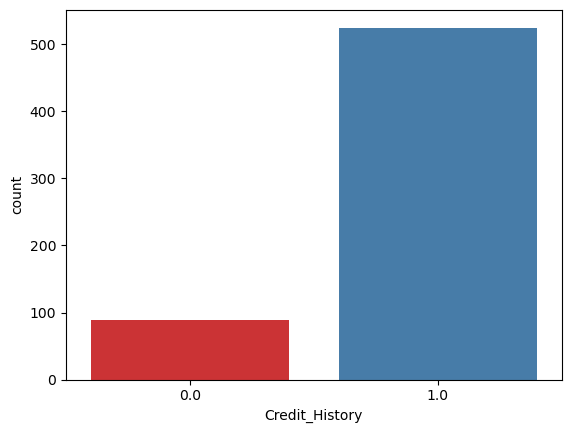

In [23]:
print("People of take loan as group by credit history")
print(df['Credit_History'].value_counts())
sns.countplot(x="Credit_History",data=df,palette="Set1")

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [27]:
for i in range(0,5):
    x_train.iloc[:, i] = x_train.iloc[:, i].astype(str)
    x_train.iloc[:,i]=le.fit_transform(x_train.iloc[:,i])
    x_train.iloc[:,7]=le.fit_transform(x_train.iloc[:,7])
x_train

,Gender,Married,Dependents,Education,Loan_Amount_Term,Credit_History,LoanAmount_log,TotalIncome
90,1,1,0,0,5,1.0,4.875197,267.0
533,1,0,1,0,5,1.0,5.278115,407.0
452,1,1,0,0,5,0.0,5.003946,249.0
355,0,0,0,0,1,1.0,4.753590,97.0
266,1,1,2,0,5,1.0,5.010635,276.0
...,...,...,...,...,...,...,...,...
277,1,1,0,0,5,1.0,4.382027,142.0
9,1,1,1,0,5,1.0,5.855072,447.0
359,1,1,3,0,5,1.0,5.298317,363.0
192,1,1,0,1,5,1.0,5.075174,273.0


In [28]:
ley=LabelEncoder()

In [29]:
y_train=ley.fit_transform(y_train)
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [30]:
le1=LabelEncoder()
for i in range(0,5):
    x_test.iloc[:,i]=x_test.iloc[:,i].astype(str)
    x_test.iloc[:,i]=le1.fit_transform(x_test.iloc[:,i])
    x_test.iloc[:,7]=le1.fit_transform(x_test.iloc[:,7])
x_test

,Gender,Married,Dependents,Education,Loan_Amount_Term,Credit_History,LoanAmount_log,TotalIncome
454,1,0,0,0,4,1.0,4.430817,85.0
52,0,0,0,0,4,1.0,4.718499,28.0
536,1,1,0,0,4,1.0,5.780744,104.0
469,1,1,0,0,4,1.0,4.700480,80.0
55,1,1,2,0,4,1.0,4.574711,22.0
...,...,...,...,...,...,...,...,...
337,1,1,2,0,4,1.0,5.170484,86.0
376,1,1,3,0,4,1.0,4.867534,115.0
278,1,1,0,0,4,1.0,6.077642,116.0
466,1,1,3,1,2,0.0,4.248495,40.0


In [31]:
ley1=LabelEncoder()
y_test=ley1.fit_transform(y_test)
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [32]:
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [35]:
from sklearn import metrics
y_pred=rfc.predict(x_test)
print("Accuracy of random forest classifier",metrics.accuracy_score(y_pred,y_test))

Accuracy of random forest classifier 0.7723577235772358


In [36]:
y_pred

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [37]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [38]:
y_pred=nb.predict(x_test)
print("Accuracy of GaussNB ",metrics.accuracy_score(y_pred,y_test))

Accuracy of GaussNB  0.8292682926829268


In [39]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [40]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [41]:
y_pred=dtc.predict(x_test)
print("Accuracy using Decision Tree Classifier ",metrics.accuracy_score(y_pred,y_test))

Accuracy using Decision Tree Classifier  0.7723577235772358


In [42]:
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1])

In [43]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
y_pred=kn.predict(x_test)
print("Accuracy using Kneighbors ",metrics.accuracy_score(y_pred,y_test))

Accuracy using Kneighbors  0.7967479674796748


In [44]:
y_pred

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])